In [1]:
from collections import Counter
import matplotlib.pyplot as plt

In [34]:
num_friends = [100, 100, 49, 41, 40, 25, 2, 2, 3, 1, 2, 3, 2, 4, 4, 5, 4, 3, 4, 5, 4 ,3 ,1]

In [3]:
friends_counts = Counter(num_friends)
xs = range(max(num_friends) + 1)
ys = [friends_counts[x] for x in xs]

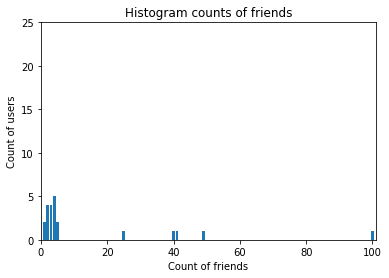

In [4]:
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram counts of friends")
plt.xlabel("Count of friends")
plt.ylabel("Count of users")
plt.show()

In [5]:
num_points = len(num_friends)
num_points

22

In [6]:
largest_value = max(num_friends)
largest_value

100

In [7]:
smallest_value = min(num_friends)
smallest_value

1

In [8]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]

In [9]:
from typing import List

In [10]:
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)

13.954545454545455

In [11]:
def _median_odd(xs: List[float]) -> float:
    '''if len(xs) is odd then median is center element'''
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    ''' if len(xs) is even then median is mean of 2 center elements'''
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

In [12]:
def median(v: List[float]) -> float:
    '''Return median of vector v'''
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [13]:
median(num_friends)

4.0

In [14]:
def quantile(x: List[float], p: float) -> float:
    '''Return from x, value being p-tym percentyl'''
    p_index = int(p * len(x))
    return sorted(x)[p_index]

assert quantile(num_friends, 0.05) == 1

In [15]:
num_friends

[100, 49, 41, 40, 25, 2, 2, 3, 1, 2, 3, 2, 4, 4, 5, 4, 3, 4, 5, 4, 3, 1]

In [16]:
def mode(x: List[float]) -> List[float]:
    '''Return a list, set can contain more than one dominant'''
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]

assert set(mode(num_friends)) == {4}

In [17]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) == 99

In [18]:
def interquartile_range(xs: List[float]) -> float:
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 3

In [19]:
from vectors import sum_of_squares

In [20]:
def de_mean(xs: List[float]) -> List[float]:
    '''Reshaping x by subtract mean'''
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

In [21]:
def variance(xs: List[float]) -> float:
    assert len(xs) >= 2, 'Variantion need at least 2 elements'
    
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

581.28354978355

In [22]:
import math

In [24]:
def standard_deviation(xs: List[float]) -> float:
    return math.sqrt(variance(xs))

standard_deviation(num_friends)

24.109822682540617

In [25]:
from vectors import dot

In [35]:
daily_minutes = [1, 120, 70, 65, 60, 30, 10, 11, 11, 12, 13, 14, 11, 12, 14, 13, 12, 11, 11, 12, 13 ,14 ,12]

In [36]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "Must be the same counts of elements"
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

covariance(num_friends, daily_minutes)

555.1818181818181

In [37]:
def correlation(xs: List[float], ys: List[float]) -> float:
    '''checking how big is difference between values and means'''
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation = 0

correlation(num_friends, daily_minutes)

0.668661904736516

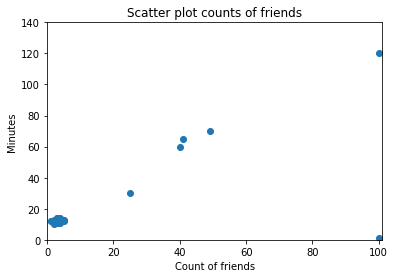

In [38]:
plt.scatter(num_friends, daily_minutes)
plt.axis([0, 101, 0, 140])
plt.title("Scatter plot counts of friends")
plt.xlabel("Count of friends")
plt.ylabel("Minutes")
plt.show()

In [45]:
outlier = num_friends.index(100)

In [46]:
num_friends_good = [x
                   for i, x in enumerate(num_friends)
                   if i != outlier]
daily_minutes_good = [x
                     for i, x in enumerate(daily_minutes)
                     if i != outlier]

In [48]:
correlation(num_friends_good, daily_minutes_good)
# after delete from list outlier, correlation increase to 99%

0.9927272504060737